In [260]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.decomposition import PCA
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import*
from IPython.display import display, Markdown
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [272]:
display(Markdown("# TESTING DATA"))

# TESTING DATA

In [200]:
df2=pd.read_csv('test-ne-gold.txt', header=None, sep='\t')

In [271]:
display(Markdown("### TRAINING DATA"))

### TRAINING DATA

In [201]:
df=pd.read_csv('train.txt', sep='\t',  header=None)

In [265]:
df.head(2)


,0,1
0,Зад думите “просто искам да се махна от Българ...,bg
1,Сега нещата там леко потръгнаха с усилията на ...,bg


In [266]:
df2.head(2)

,0,1
0,"El Foro Regional Rosario, asociación civil com...",es-AR
1,"«É evidente que, se antes do jogo, me falassem...",pt-PT


In [269]:
display(Markdown("# TRANSFORM DATA"))

# TRANSFORM DATA

In [267]:
# create the transform
train_vectorizer = CountVectorizer()
train_vectorizer_out=vectorizer.fit_transform(df.as_matrix()[:,0])


C:\Users\geeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [276]:
test_vectorizer = CountVectorizer()
test_vectorizer_out=vectorizer.fit_transform(df2.as_matrix()[:,0])

C:\Users\geeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [274]:
display(Markdown("# SVD-singular value decomposition"))
display(Markdown("## Alternative for PCA"))

# SVD-singular value decomposition

## Alternative for PCA

In [277]:
#training data ####

train_svd = TruncatedSVD(n_components=15)
train_svd_reduced=svd.fit_transform(train_vectorizer_out)

### testing data ###

test_svd = TruncatedSVD(n_components=15)
test_svd_reduced=svd.fit_transform(test_vectorizer_out)

In [278]:
train_svd_reduced.shape

(236135, 15)

In [279]:
test_svd_reduced.shape

(13185, 15)

In [280]:
X_train = train_svd_reduced[:, :2]
X_test = test_svd_reduced[:, :2]

In [281]:
Y_train=df.as_matrix()[:,1]
Y_test=df2.as_matrix()[:,1]

C:\Users\geeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\geeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [282]:
display(Markdown("# For training Data"))

# For training Data

Text(0,0.5,'feature 2')

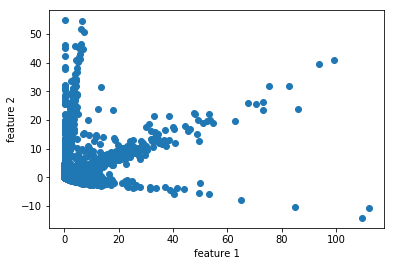

In [285]:
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.xlabel('feature 1')
plt.ylabel('feature 2')


In [284]:
display(Markdown("# For Testing Data"))

# For Testing Data

Text(0,0.5,'feature 2')

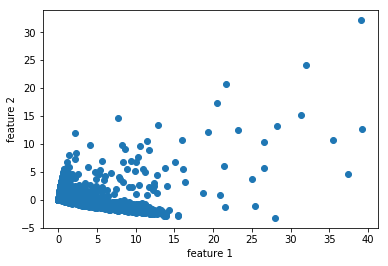

In [286]:
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.xlabel('feature 1')
plt.ylabel('feature 2')


In [287]:
display(Markdown("# Random Forest"))

# Random Forest

In [289]:
#### for training ######
train_RF_clf = RandomForestClassifier(max_depth=2, random_state=0)
train_RF_clf.fit(train_svd_reduced,Y_train)

#### for testing #####

test_RF_clf = RandomForestClassifier(max_depth=2, random_state=0)
test_RF_clf.fit(test_svd_reduced,Y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [290]:
#### for training ######
train_RF_prd=train_RF_clf.predict(train_svd_reduced)
#### for testing #####
test_RF_prd=test_RF_clf.predict(test_svd_reduced)

In [292]:
train_RF_ACC=accuracy_score(train_RF_prd, Y_train)
train_RF_ACC



0.49910009104961145

In [293]:
test_RF_ACC=accuracy_score(test_RF_prd, Y_test)
test_RF_ACC

0.4408797876374668

In [294]:
train_RF_CM=confusion_matrix(Y_train, train_RF_prd)



In [295]:
test_RF_CM=confusion_matrix(Y_test,test_RF_prd)

In [296]:
display(Markdown("# for training data"))

# for training data

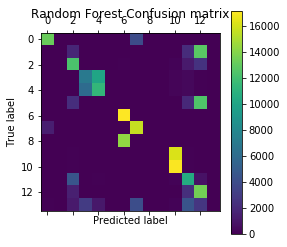

In [297]:
plt.matshow(train_RF_CM)
plt.title('Random Forest Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [298]:
display(Markdown("# for testing data"))

# for testing data

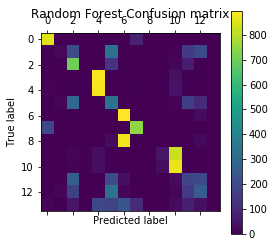

In [299]:
plt.matshow(test_RF_CM)
plt.title('Random Forest Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [300]:
display(Markdown("# SVM"))

# SVM

In [301]:
train_SVC_clf = LinearSVC(random_state=0)
test_SVC_clf=LinearSVC(random_state=0)

In [302]:
train_SVC_clf.fit(train_svd_reduced, Y_train)
test_SVC_clf.fit(test_svd_reduced,Y_test)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [303]:
train_SVC_pred=train_SVC_clf.predict(train_svd_reduced)
test_SVC_pred=test_SVC_clf.predict(test_svd_reduced)

In [304]:
train_SVM_ACC=accuracy_score(train_SVC_pred,Y_train)
train_SVM_ACC

0.66188409172719

In [305]:
test_SVM_ACC=accuracy_score(test_SVC_pred,Y_test)
test_SVM_ACC

0.5312855517633674

In [306]:
train_SVM_CM=confusion_matrix(Y_train, train_SVC_pred)

In [307]:
test_SVM_CM=confusion_matrix(Y_test, test_SVC_pred)


In [308]:
display(Markdown("# for training data"))

# for training data

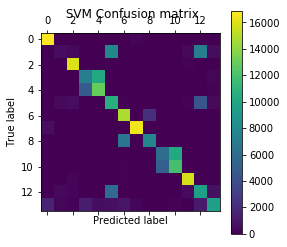

In [309]:
plt.matshow(train_SVM_CM)
plt.title(' SVM Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [310]:
display(Markdown("# for testing data"))

# for testing data

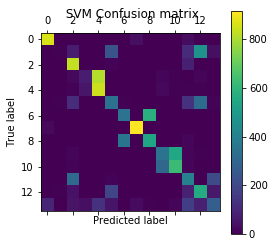

In [311]:
plt.matshow(test_SVM_CM)
plt.title(' SVM Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [312]:
display(Markdown("# Logistic Regression"))

# Logistic Regression

In [313]:
train_LR_clf=LogisticRegression(random_state=None)
train_LR_clf.fit(train_svd_reduced,Y_train)

test_LR_clf=LogisticRegression(random_state=None)
test_LR_clf.fit(test_svd_reduced,Y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [314]:
train_Lr_pred=train_LR_clf.predict(train_svd_reduced)


test_Lr_pred=test_LR_clf.predict(test_svd_reduced)

In [315]:
train_Lr_acc=accuracy_score(train_Lr_pred,Y_train)
train_Lr_acc

0.6610328837317636

In [316]:
test_Lr_acc=accuracy_score(test_Lr_pred,Y_test)
test_Lr_acc

0.570193401592719

In [317]:
train_LR_CM=confusion_matrix(Y_train, train_Lr_pred)

In [318]:
test_LR_CM=confusion_matrix(Y_test, test_Lr_pred)

In [319]:
display(Markdown("# for training data"))

# for training data

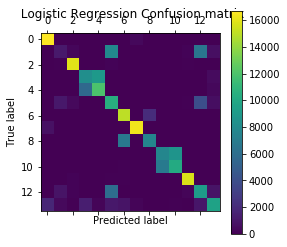

In [320]:
plt.matshow(train_LR_CM)
plt.title(' Logistic Regression Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [322]:
display(Markdown("# for testing data"))

# for testing data

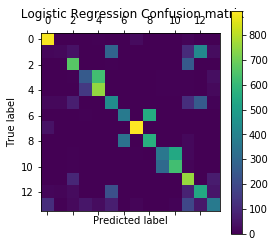

In [323]:
plt.matshow(test_LR_CM)
plt.title(' Logistic Regression Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [324]:
display(Markdown("# DECISION TREE"))

# DECISION TREE

In [325]:
train_Dt_clf = tree.DecisionTreeClassifier()
test_Dt_clf = train_Dt_clf.fit(train_svd_reduced, Y_train)

test_Dt_clf = tree.DecisionTreeClassifier()
test_Dt_clf = test_Dt_clf.fit(test_svd_reduced, Y_test)

In [327]:
train_Dt_pred=train_Dt_clf.predict(train_svd_reduced)


test_DT_pred=test_Dt_clf.predict(test_svd_reduced)

In [328]:
train_Dt_acc=accuracy_score(train_Dt_pred,Y_train)
train_Dt_acc

0.9999957651343511

In [330]:
test_Dt_acc=accuracy_score(test_DT_pred,Y_test)
test_Dt_acc

1.0

In [331]:
train_DT_CM=confusion_matrix(Y_train, train_Dt_pred)

test_DT_CM=confusion_matrix(Y_test, test_DT_pred)


In [332]:
display(Markdown("# for training data"))

# for training data

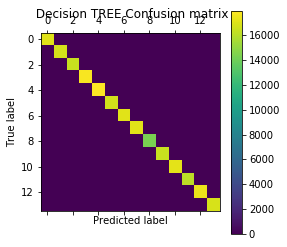

In [333]:
plt.matshow(train_DT_CM)
plt.title(' Decision TREE Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [334]:
display(Markdown("# for testing data"))

# for testing data

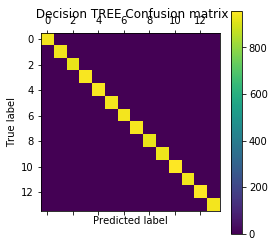

In [335]:
plt.matshow(test_DT_CM)
plt.title(' Decision TREE Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [337]:
display(Markdown("# NAIVE BAYES"))
display(Markdown("## GAUSSIAN NAIVE BAYES"))

# NAIVE BAYES

## GAUSSIAN NAIVE BAYES

In [338]:
train_GNB_clf = GaussianNB()
train_GNB_clf.fit(train_svd_reduced, Y_train)



test_GNB_clf = GaussianNB()
test_GNB_clf.fit(test_svd_reduced, Y_test)

GaussianNB(priors=None)

In [339]:
train_GNB_pred=train_GNB_clf.predict(train_svd_reduced)

test_GNB_pred=test_GNB_clf.predict(test_svd_reduced)


In [341]:
train_GNB_acc=accuracy_score(train_GNB_pred,Y_train)
train_GNB_acc

0.5231160141444513

In [342]:
test_GNB_acc=accuracy_score(test_GNB_pred,Y_test)
test_GNB_acc

0.4402730375426621

In [344]:
train_GNB_CM=confusion_matrix(Y_train, train_GNB_pred)

test_GNB_CM=confusion_matrix(Y_test, test_GNB_pred)


In [345]:
display(Markdown("## for training data"))

## for training data

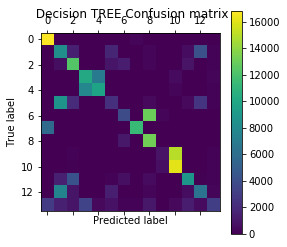

In [347]:
plt.matshow(train_GNB_CM)
plt.title(' Decision TREE Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [348]:
display(Markdown("## for testing data"))

## for testing data

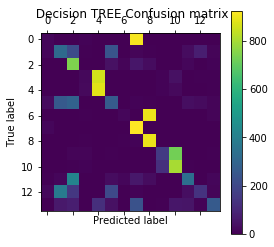

In [350]:
plt.matshow(test_GNB_CM)
plt.title(' Decision TREE Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [352]:
display(Markdown("## BERNOULLI NAIVE BAYES "))

## BERNOULLI NAIVE BAYES 

In [354]:
train_BNB_clf = BernoulliNB()
train_BNB_clf.fit(train_svd_reduced, Y_train)

test_BNB_clf = BernoulliNB()
test_BNB_clf.fit(test_svd_reduced, Y_test)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [355]:
train_BNB_pred=train_BNB_clf.predict(train_svd_reduced)

test_BNB_pred=test_BNB_clf.predict(test_svd_reduced)

In [356]:
train_BNB_acc=accuracy_score(train_BNB_pred,Y_train)
train_BNB_acc


0.5455777415461495

In [357]:
test_BNB_acc=accuracy_score(test_BNB_pred,Y_test)
test_BNB_acc

0.48668941979522184

In [358]:
train_BNB_CM=confusion_matrix(Y_train, train_BNB_pred)

test_BNB_CM=confusion_matrix(Y_test, test_BNB_pred)

In [359]:
display(Markdown("## for training data "))

## for training data 

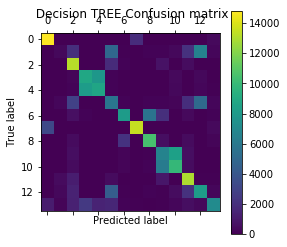

In [360]:
plt.matshow(BNB_CM)
plt.title(' Decision TREE Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [361]:
display(Markdown("## for testing data "))

## for testing data 

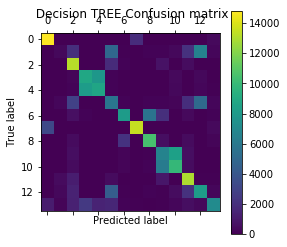

In [362]:
plt.matshow(BNB_CM)
plt.title(' Decision TREE Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()